## Visual Secret Sharing

This program creates 2 images when they are superimposed on each other a secret message emarges

In [119]:
# import all the usual suspects
import numpy as np
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# Your message
text = "Don't Tell Anyone"

# Load a font
font = ImageFont.load_default()

# Create a temporary image to calculate text size
dummy_img = Image.new('1', (1, 1))
draw = ImageDraw.Draw(dummy_img)

# Use textbbox to get bounding box of the text
bbox = draw.textbbox((0, 0), text, font=font)
width = bbox[2] - bbox[0]
height = bbox[3] - bbox[1]

# Create the actual image with padding
image = Image.new('1', (width + 10, height + 10), color=1)  # White background
draw = ImageDraw.Draw(image)
draw.text((5, 5), text, font=font, fill=0)  # Black text

# Save the image
image.save("text_bitmap.bmp")



# Load the bitmap image
image = Image.open("text_bitmap.bmp")

# Convert to NumPy array
bitmap_array = np.array(image)

# Print the array (optional)
# print(bitmap_array)
bitmap_array = (np.array(image) == 0).astype(np.uint8)  # 1 for black text, 0 for white




[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [ ]:
# height width

h,w = bitmap_array.shape[0],bitmap_array.shape[1]

s1 = np.zeros([h,w],dtype="int64")

for i in range(h):
    for j in range(w):
        s1[i,j] = np.random.choice([0, 1])
# s1 = np.ones([h,w]) - s1
# s1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 1]])

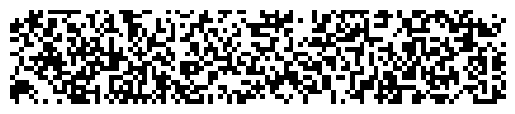

In [122]:
plt.imshow(s1, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Optional: remove axis ticks
plt.show()


In [123]:
# secret = np.zeros([h,w],dtype='int64')
# secret[0,0] = 1
# secret[0,1] = 1
# secret[0,2] = 1
# secret[1,1] = 1
# secret[2,1] = 1

secret = bitmap_array

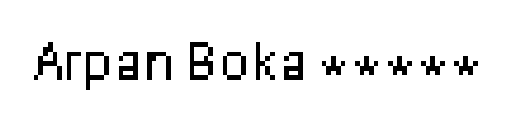

In [124]:
plt.imshow(np.ones([h,w])-secret, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Optional: remove axis ticks
plt.show()

In [125]:
#encode the secret
s2 = (s1 + secret) % 2 
s2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 1]])

In [126]:
# create visual secret share
def create_vss(s):
    z_pat = np.zeros([2,2])
    z_pat[0,1] = 1
    z_pat[1,0] = 1
    o_pat = np.zeros([2,2])
    o_pat[0,0] = 1
    o_pat[1,1] = 1

    A = np.zeros([s.shape[0]*2,s.shape[1]*2],dtype='int64')
    for i in range (s.shape[0]):
        for j in range (s.shape[1]):
            if s[i,j]==0:
                #copy 0 pattern
                A[i*2:i*2+2,j*2:j*2+2] = z_pat
            else:
                A[i*2:i*2+2,j*2:j*2+2] = o_pat
    return A

In [127]:
vss1 = create_vss(create_vss(s1))
vss1

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [128]:
vss2 =  create_vss(create_vss(s2))
vss2

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [129]:
# compute image size 
n = len(text)
dpi = 300
unit_px = 2000
sh_px = 2*unit_px
sw_px = n*unit_px
sh_in = sh_px / dpi
sw_in = sw_px / dpi

print (sh_in,sw_in)

13.333333333333334 106.66666666666667


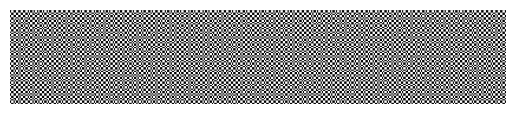

In [130]:
vss = vss1
rgba = np.zeros((vss.shape[0], vss.shape[1], 4))
rgba[vss == 0] = [0, 0, 0, 1]

plt.imshow(rgba)

plt.axis('off')

#plt.show()
# Create a figure with specific size
fig = plt.figure(figsize=(sh_in, sw_in), dpi=dpi)
plt.imshow(rgba)
# plt.axis('off')

# Save without extra padding or borders
plt.savefig('S1.png', dpi=100, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close(fig)

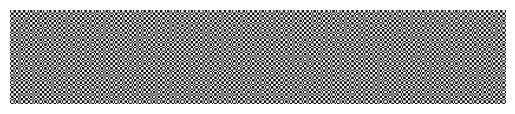

In [131]:
vss = vss2
rgba = np.zeros((vss.shape[0], vss.shape[1], 4))
rgba[vss == 0] = [0, 0, 0, 1]

plt.imshow(rgba)

plt.axis('off')

#plt.show()
# Create a figure with specific size
fig = plt.figure(figsize=(sh_in, sw_in), dpi=dpi)
plt.imshow(rgba)
# plt.axis('off')

# Save without extra padding or borders
plt.savefig('S2.png', dpi=100, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close(fig)